# Step 1: Preprocessing

Pick any dataset from the list, implement the **preprocessing** and justify the preprocessing steps,
**extract features** and justify the methods used, **select features** and justify the methods used. Some of this is done already in one of the previous assignments. You can reuse things. 

In [542]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
from tqdm import tqdm

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

## Load the Data

In [543]:
graduates_df = pd.read_csv('graduation_dataset.csv')
graduates_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Explore data


In [544]:
graduates_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [545]:
graduates_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [546]:
graduates_df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [547]:
graduates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [548]:
categorical_cols = graduates_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['Target']


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3865410624.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




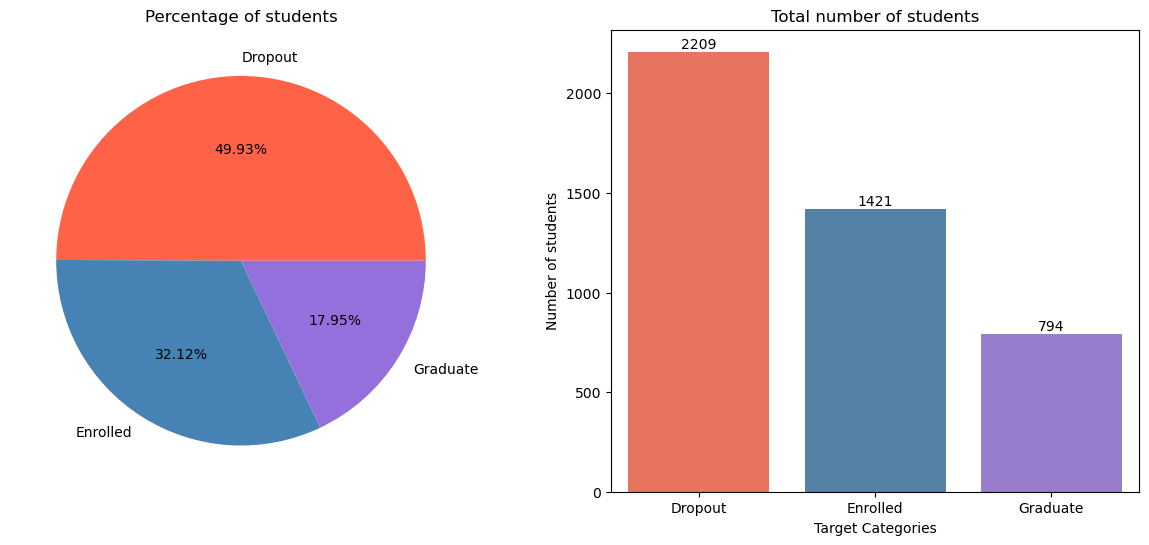

In [549]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (if graduates_df is already set, you can skip this part)
# graduates_df = pd.DataFrame({'Target': ['Graduate', 'Dropout', 'Enrolled', 'Graduate', ...]})
data_pie = graduates_df['Target'].value_counts()

# Define a custom color palette with distinct random colors
custom_colors = ["#FF6347", "#4682B4", "#9370DB"]  # Tomato red, Steel blue, Medium purple

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(data_pie, autopct="%.2f%%", labels=["Dropout", "Enrolled", "Graduate"], colors=custom_colors)
ax1.set_title('Percentage of students')

# Bar plot
ax2 = sns.barplot(x=["Dropout", "Enrolled", "Graduate"], y=data_pie.values, palette=custom_colors)
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')

# Add labels manually to each bar
for bar, label in zip(ax2.patches, data_pie.values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        bar.get_height(),                    # Y position
        f'{label}',                          # Label to display
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()




/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3700450929.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




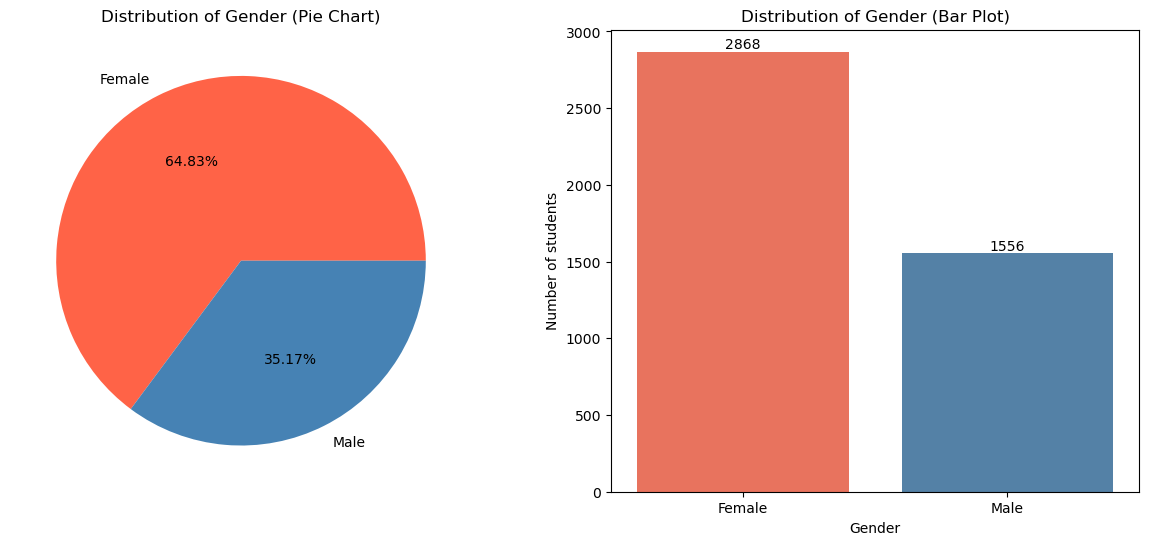

In [550]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (assuming graduates_df['Gender'] is provided)
# graduates_df = pd.DataFrame({'Gender': [0, 1, 1, 0, ...]})
data_gender = graduates_df['Gender'].value_counts()

# Mapping gender values
gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

# Define a custom color palette with distinct colors
custom_colors = ["#FF6347", "#4682B4"]  # Tomato red, Steel blue

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=custom_colors)
ax1.set_title('Distribution of Gender (Pie Chart)')

# Bar plot
ax2 = sns.barplot(x=data_gender_labels, y=data_gender.values, palette=custom_colors)
ax2.set(xlabel='Gender', ylabel='Number of students')
ax2.set_title('Distribution of Gender (Bar Plot)')

# Manually add labels to each bar in the bar plot
for bar, label in zip(ax2.patches, data_gender.values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,   # X position
        bar.get_height(),                    # Y position
        f'{label}',                          # Label to display
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()


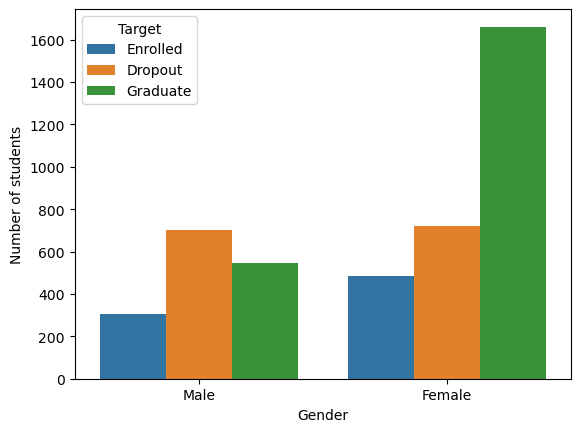

In [551]:
# Ensure 'Gender' column is properly mapped
graduates_df['Gender'] = graduates_df['Gender'].map({0: 'Female', 1: 'Male'})

sns.countplot(data=graduates_df, x='Gender', hue='Target', order=['Male', 'Female'], hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.ylabel('Number of students')
plt.show()

## Age distribution of students

In [558]:
fig = px.histogram(graduates_df, x='Age at enrollment', color='Target',
                   opacity=0.75, barmode='overlay',
                   width=800, height=500, color_discrete_sequence=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])

fig.update_layout(title='Age distribution of students')

# Show the figure
fig.show()


##  Removing any values outside the given values from description

In [514]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Uncomment and replace 'your_data.csv' with your dataset file

# Define the valid ranges or categories for each attribute
valid_values = {
    "Marital status": [1, 2, 3, 4, 5, 6],
    "Application mode": [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57],
    "Application order": range(0, 10),  # 0 to 9
    "Course": [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
    "Daytime/evening attendance": [0, 1],
    "Previous qualification": [1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43],
    "Previous qualification grade": range(0, 201),  # 0 to 200
    "Nationality": [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
    "Mother's qualification": [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
    "Father's qualification": [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
    "Mother's occupation": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194],
    "Father's occupation": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195],
    "Admission Grade": range(0, 201),  # 0 to 200
    "Displaced": [0, 1],
    "Educational pecial needs": [0, 1],
    "Debtor": [0, 1],
    "Tuition fees up to date": [0, 1],
    "Gender": [0, 1],
    "Scholarship holder": [0, 1],
    "Age at enrollment": range(0, 120),  # Assuming an age range for validation
    "International": [0, 1],
    "Curricular units 1st sem (credited)": range(0, 100),  # Set a reasonable max value
    "Curricular units 1st Sem (Enrolled)": range(0, 100),
    "Curricular units 1st Sem (Evaluations)": range(0, 100),
    "Curricular units 1st Sem (Approved)": range(0, 100),
    "Curricular units 1st Sem (Grade)": range(0, 21),  # 0 to 20
    "Curricular units 1st Sem (Without Evaluations)": range(0, 100),
    "Curricular units 2nd Sem (Credited)": range(0, 100),
    "Curricular units 2nd Sem (Enrolled)": range(0, 100),
    "Curricular units 2nd Sem (Evaluations)": range(0, 100),
    "Curricular units 2nd Sem (Approved)": range(0, 100),
    "Curricular units 2nd Sem (Grade)": range(0, 21),  # 0 to 20
    "Curricular units 2nd Sem (Without Evaluations)": range(0, 100),
    "Unemployment Rate": range(0, 101),  # 0 to 100%
    "Inflation Rate": range(-100, 101),  # Assuming a plausible range
    "GDP": (0, float('inf')),  # Positive values only
    "Target": ["Dropout", "Enrolled", "Graduate"]
}

# Function to validate and filter rows
def filter_invalid_values(df):
    for column, valid_range in valid_values.items():
        if column in df.columns:
            # Check if valid_range is a range or list
            if isinstance(valid_range, range) or isinstance(valid_range, list):
                df = df[df[column].isin(valid_range)]
            elif isinstance(valid_range, tuple):  # For GDP where we check > 0
                df = df[df[column] > valid_range[0]]
            else:  # For categorical target
                df = df[df[column].isin(valid_range)]
    return df

# Apply the function to the DataFrame
df_cleaned = filter_invalid_values(graduates_df)

# Display the cleaned DataFrame
print(df_cleaned)


Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 35 columns]


## Outliers

Number of outliers in Age at Enrollment: 441
      Marital status  Application mode  Application order  Course  \
4                  2                12                  1       3   
5                  2                12                  1      17   
35                 1                12                  1       1   
36                 1                12                  1       7   
37                 1                14                  1       9   
...              ...               ...                ...     ...   
4388               2                14                  1       9   
4400               2                12                  1      17   
4408               2                12                  1      15   
4409               2                14                  1      17   
4415               4                12                  1      12   

      Daytime/evening attendance  Previous qualification  Nacionality  \
4                              0                     

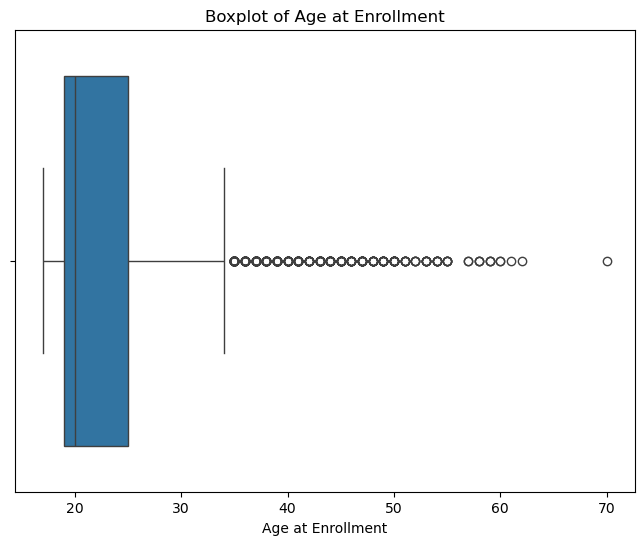

In [515]:
# Calculate Q1, Q3, and IQR for the "Age at Enrollment" column
Q1 = graduates_df['Age at enrollment'].quantile(0.25)
Q3 = graduates_df['Age at enrollment'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for the "Age at Enrollment" column
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find the outliers in the "Age at Enrollment" column
outliers = (graduates_df['Age at enrollment'] < lower_bound) | (graduates_df['Age at enrollment'] > upper_bound)

# Count the total number of outliers
num_outliers = outliers.sum()

print(f'Number of outliers in Age at Enrollment: {num_outliers}')

# Display the rows with outliers in the "Age at Enrollment" column
print(graduates_df[outliers])

# Create the boxplot for "Age at Enrollment"
plt.figure(figsize=(8, 6))
sns.boxplot(x=graduates_df['Age at enrollment'])
plt.title('Boxplot of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.show()

In [516]:
graduates_df.shape

(4424, 35)

/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/476960980.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/476960980.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/476960980.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/476960980.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

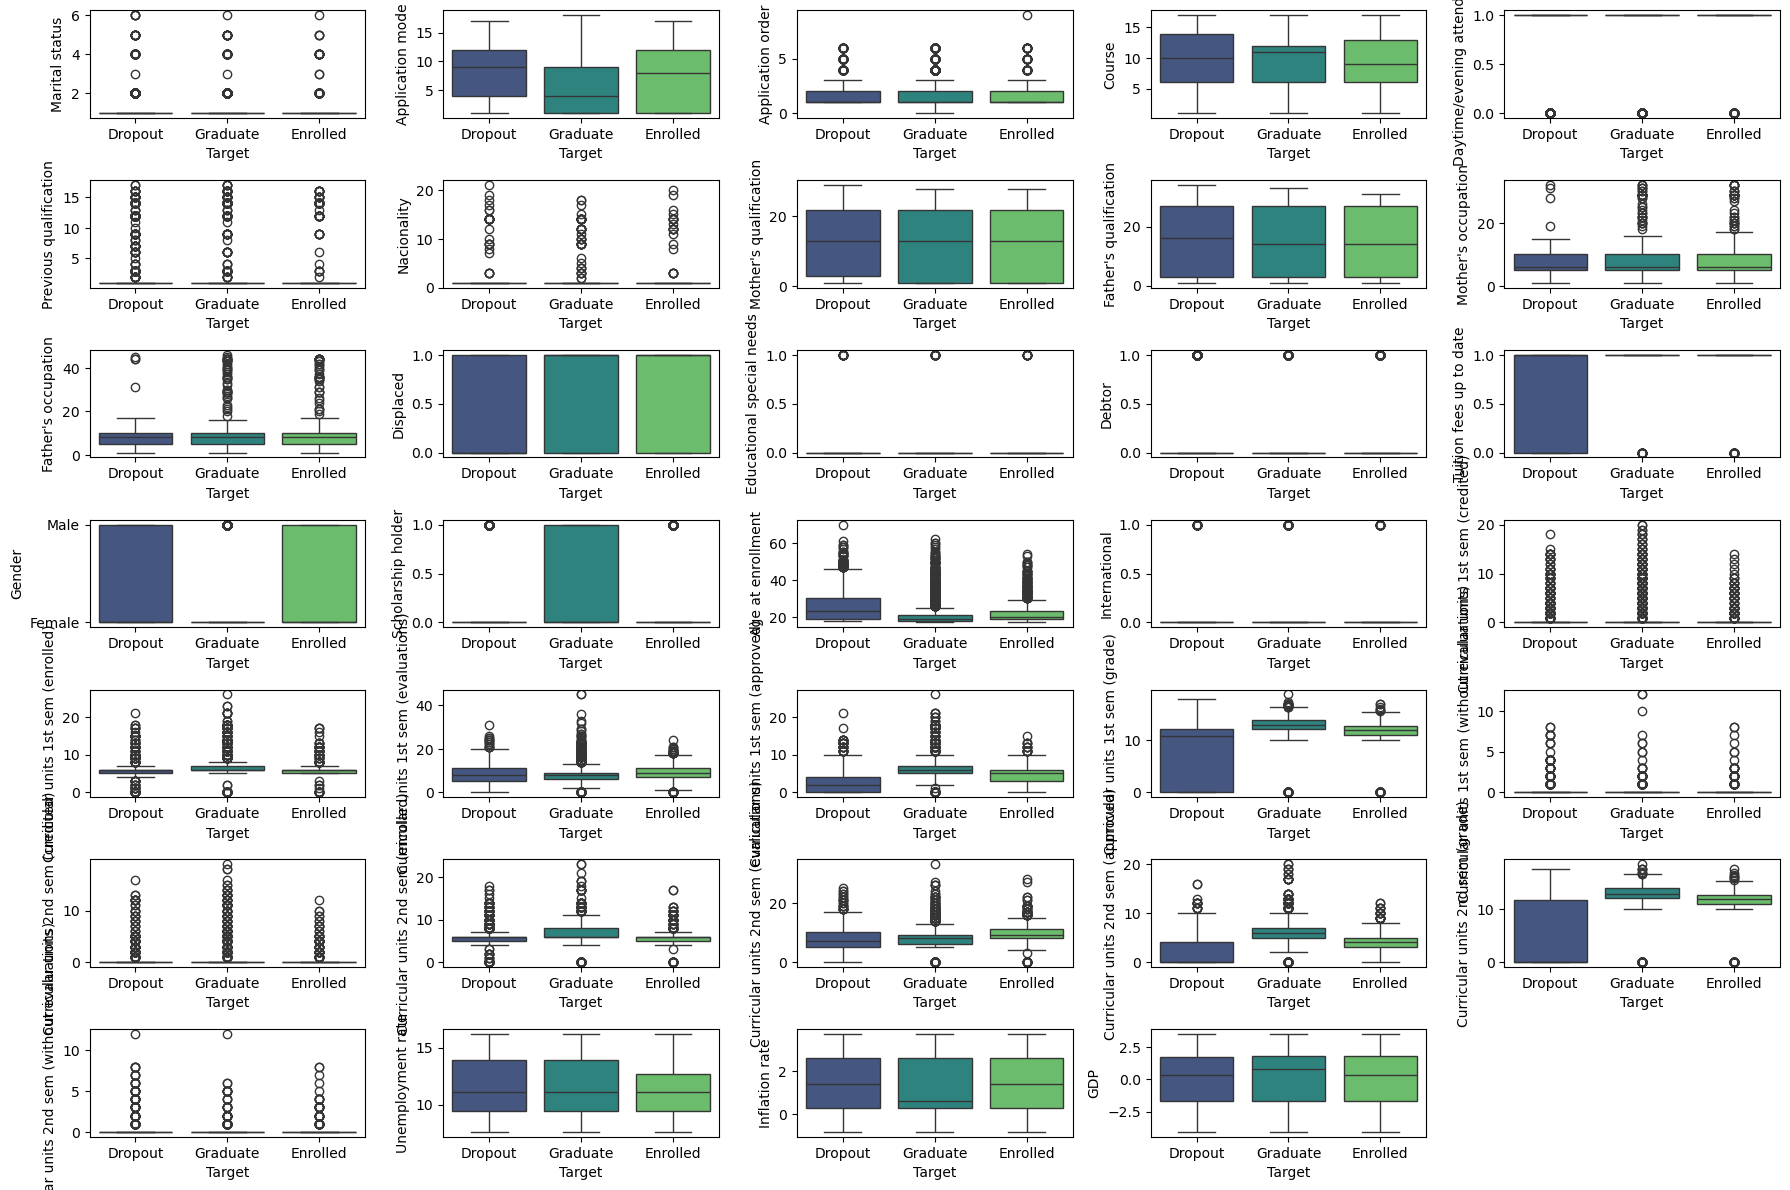

In [517]:
#Presenation of the data with outliers with boxplot

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(graduates_df.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=graduates_df, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

Skipping column Gender because it is not numeric.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3340776329.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3340776329.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3340776329.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/3340776329.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

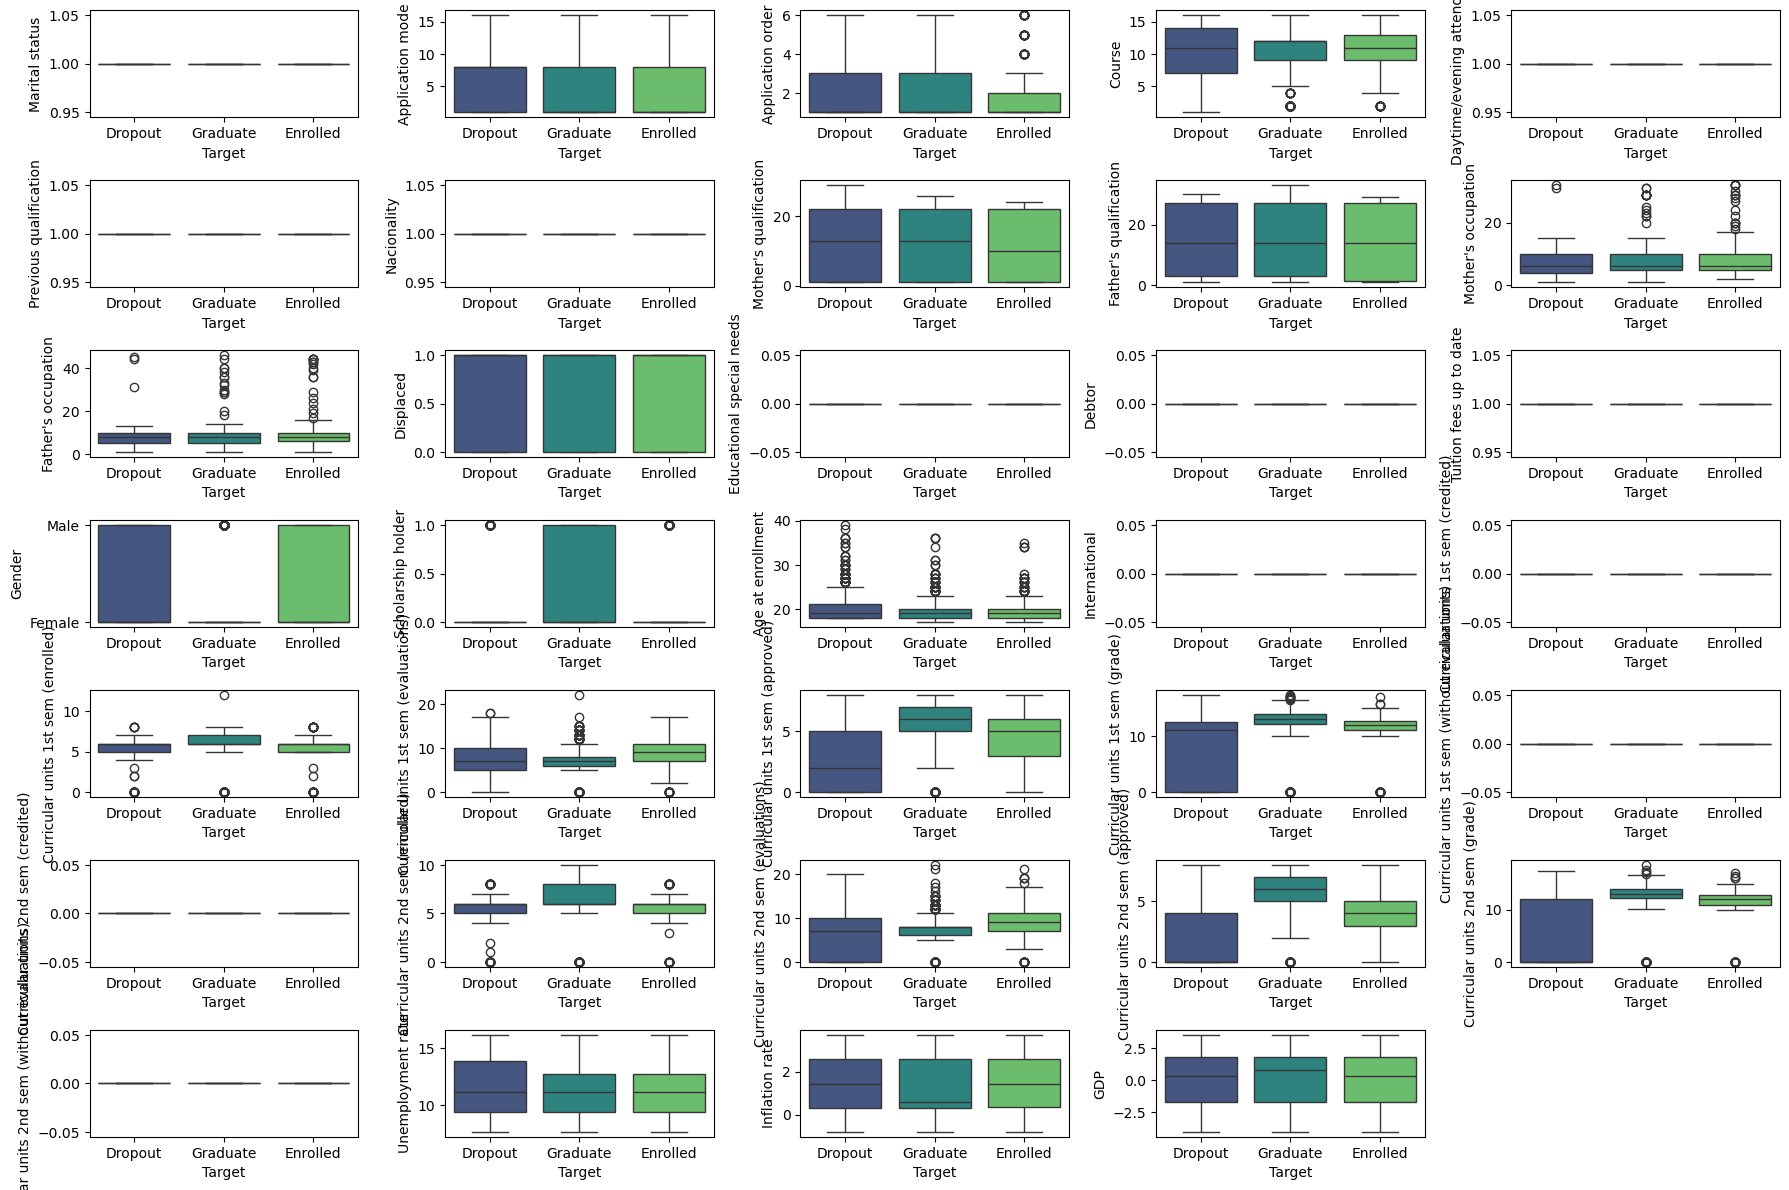

In [518]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column, k):
    # Ensure the column is numeric
    if df[column].dtype != 'object':  # Check if column is not a string
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df_filtered
    else:
        # Return the dataframe unchanged if the column is not numeric
        print(f"Skipping column {column} because it is not numeric.")
        return df

# Assuming graduates_df is your dataframe and you want to remove outliers from all columns except the last one
for col in graduates_df.columns[:-1]:  # Exclude the last column (target column)
    graduates_df = remove_outliers_iqr(graduates_df, col, 10)  # k=10 for outlier detection

# Plotting boxplots for each column after outlier removal
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(graduates_df.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=graduates_df, palette='viridis')  # Assuming 'Target' is the column you're plotting against
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


In [519]:
graduates_df.shape

(2274, 35)

## Feature selection

 --> Denne utgår litt da vi typ gjør dette i outliers

In [520]:
# Remove rows where "Age at Enrollment" is greater than 35
#graduates_under35_df = graduates_df[graduates_df['Age at enrollment'] <= 35]

# Display the first few rows of the filtered DataFrame
#graduates_under35_df.head(100)


I only want boolean for Target column, so I am removing "Enrolled" here before encoding.

In [521]:
only_graduates_df = graduates_df[graduates_df['Target'] != 'Enrolled']  # Filter out 'Enrolled' students

## Encoding

Gjør om Target til at verdiene der har 0, 1

* 0 --> Dropout
* 1 --> Graduate


In [522]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()



# Fit and transform the 'Target' column to encode it
only_graduates_df['Target_encoded'] = le.fit_transform(only_graduates_df['Target'])

# Print the mapping of original values to encoded labels
print("Label Encoding Mapping:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f'{original}: {encoded}')

# Drop the original 'Target' column
only_graduates_df = only_graduates_df.drop(columns=['Target'])

# Display the first few rows of the updated DataFrame
only_graduates_df.head()



Label Encoding Mapping:
Dropout: 0
Graduate: 1


/var/folders/0s/0fyq16cd5r993ng411gxwljr0000gn/T/ipykernel_21682/1290519436.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
10,1,1,1,14,1,1,1,23,14,6,...,0,6,7,5,14.200000,0,13.9,-0.3,0.79,1
11,1,1,1,12,1,1,1,13,28,10,...,0,8,8,7,13.214286,0,12.7,3.7,-1.70,1


In [523]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# List of columns to encode
columns_to_encode = [
    'Application mode', 'Course', 'Previous qualification', 
    'Nacionality', "Mother's qualification", "Father's qualification", "Gender", 
    "Mother's occupation", "Father's occupation"
]
graduates_encoded_df = only_graduates_df.copy()

# Apply Label Encoding to each specified column
for col in columns_to_encode:
    graduates_encoded_df[col] = label_encoder.fit_transform(only_graduates_df[col])

print("Label Encoding Mapping:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f'{original}: {encoded}')

# Display the first few rows of the DataFrame after encoding
graduates_encoded_df.head()


Label Encoding Mapping:
Dropout: 0
Graduate: 1


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,6,5,1,1,0,0,10,9,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,6,2,13,1,0,0,17,17,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
6,1,0,1,10,1,0,0,10,18,7,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
10,1,0,1,12,1,0,0,17,12,5,...,0,6,7,5,14.200000,0,13.9,-0.3,0.79,1
11,1,0,1,10,1,0,0,10,18,9,...,0,8,8,7,13.214286,0,12.7,3.7,-1.70,1


## Normalization

In [524]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
graduates_normalized_df = graduates_encoded_df.copy()
min_max_scaler = MinMaxScaler()
graduates_normalized_df[['Application order', 'Previous qualification',  'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
    'Curricular anits 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate']] = min_max_scaler.fit_transform(
        graduates_encoded_df[['Application order', 'Previous qualification',  'Age at enrollment',
            'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
            'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
            'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
            'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
            'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
            'Unemployment rate', 'Inflation rate']])


graduates_normalized_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded,Curricular anits 2nd sem (grade)
0,1,6,0.8,1,1,0.0,0,10,9,5,...,0.0,0.000000,0.000,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
3,1,6,0.2,13,1,0.0,0,17,17,5,...,0.6,0.454545,0.625,12.400000,0.0,0.209302,0.000000,-3.12,1,0.667692
6,1,0,0.0,10,1,0.0,0,10,18,7,...,0.8,0.363636,1.000,14.345000,0.0,0.918605,0.800000,-4.06,1,0.772423
10,1,0,0.0,12,1,0.0,0,17,12,5,...,0.6,0.318182,0.625,14.200000,0.0,0.732558,0.111111,0.79,1,0.764615
11,1,0,0.0,10,1,0.0,0,10,18,9,...,0.8,0.363636,0.875,13.214286,0.0,0.593023,1.000000,-1.70,1,0.711538


In [525]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['Marital status', 'Application mode', 'Nacionality', 
                   "Mother's qualification", "Father's qualification", "Mother's occupation", 
                   "Father's occupation"]

le = LabelEncoder()
for col in ordinal_columns:
    graduates_normalized_df[col] = le.fit_transform(graduates_normalized_df[col])

graduates_normalized_df.head(100)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded,Curricular anits 2nd sem (grade)
0,0,6,0.8,1,1,0.0,0,10,9,5,...,0.0,0.000000,0.000,0.000000,0.0,0.372093,0.488889,1.74,0,0.000000
3,0,6,0.2,13,1,0.0,0,17,17,5,...,0.6,0.454545,0.625,12.400000,0.0,0.209302,0.000000,-3.12,1,0.667692
6,0,0,0.0,10,1,0.0,0,10,18,7,...,0.8,0.363636,1.000,14.345000,0.0,0.918605,0.800000,-4.06,1,0.772423
10,0,0,0.0,12,1,0.0,0,17,12,5,...,0.6,0.318182,0.625,14.200000,0.0,0.732558,0.111111,0.79,1,0.764615
11,0,0,0.0,10,1,0.0,0,10,18,9,...,0.8,0.363636,0.875,13.214286,0.0,0.593023,1.000000,-1.70,1,0.711538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,7,1.0,10,1,0.0,0,16,17,5,...,0.8,0.363636,1.000,12.933750,0.0,0.209302,0.000000,-3.12,1,0.696433
198,0,0,0.0,14,1,0.0,0,10,12,3,...,0.7,0.363636,0.875,14.428571,0.0,0.406977,0.311111,2.02,1,0.776923
201,0,0,0.6,8,1,0.0,0,10,12,4,...,0.6,0.272727,0.750,11.333333,0.0,0.000000,0.755556,0.32,1,0.610256
202,0,0,0.6,10,1,0.0,0,10,12,7,...,0.8,0.363636,0.875,12.324286,0.0,0.372093,0.488889,1.74,1,0.663615


# Step 2 : Extracting and selecting features

- noe fra det i preprocessing faller under step 2, det må flyttes ned hit

### Removing "enrolled" (1) in Target column because it is not relevant. 

In [526]:
# Remove all rows where the 'Target' column has a value of 1
#only_graduates_df = graduates_normalized_df[graduates_normalized_df['Target_encoded'] != 1]

#only_graduates_df.head(100)

In [527]:
# Assuming 'graduates_df' is your DataFrame and 'Target' is the column you want to display
print(graduates_normalized_df['Gender'].head(10))


0     1
3     0
6     0
10    0
11    0
12    0
14    0
15    0
17    0
20    0
Name: Gender, dtype: int64


### Using correlation matrix to understand which attributes to leave out

In [528]:
# Filter for numeric columns only
numeric_df = graduates_normalized_df.select_dtypes(include=['number'])

# Recalculate the correlation matrix
correlation_matrix = numeric_df.corr()


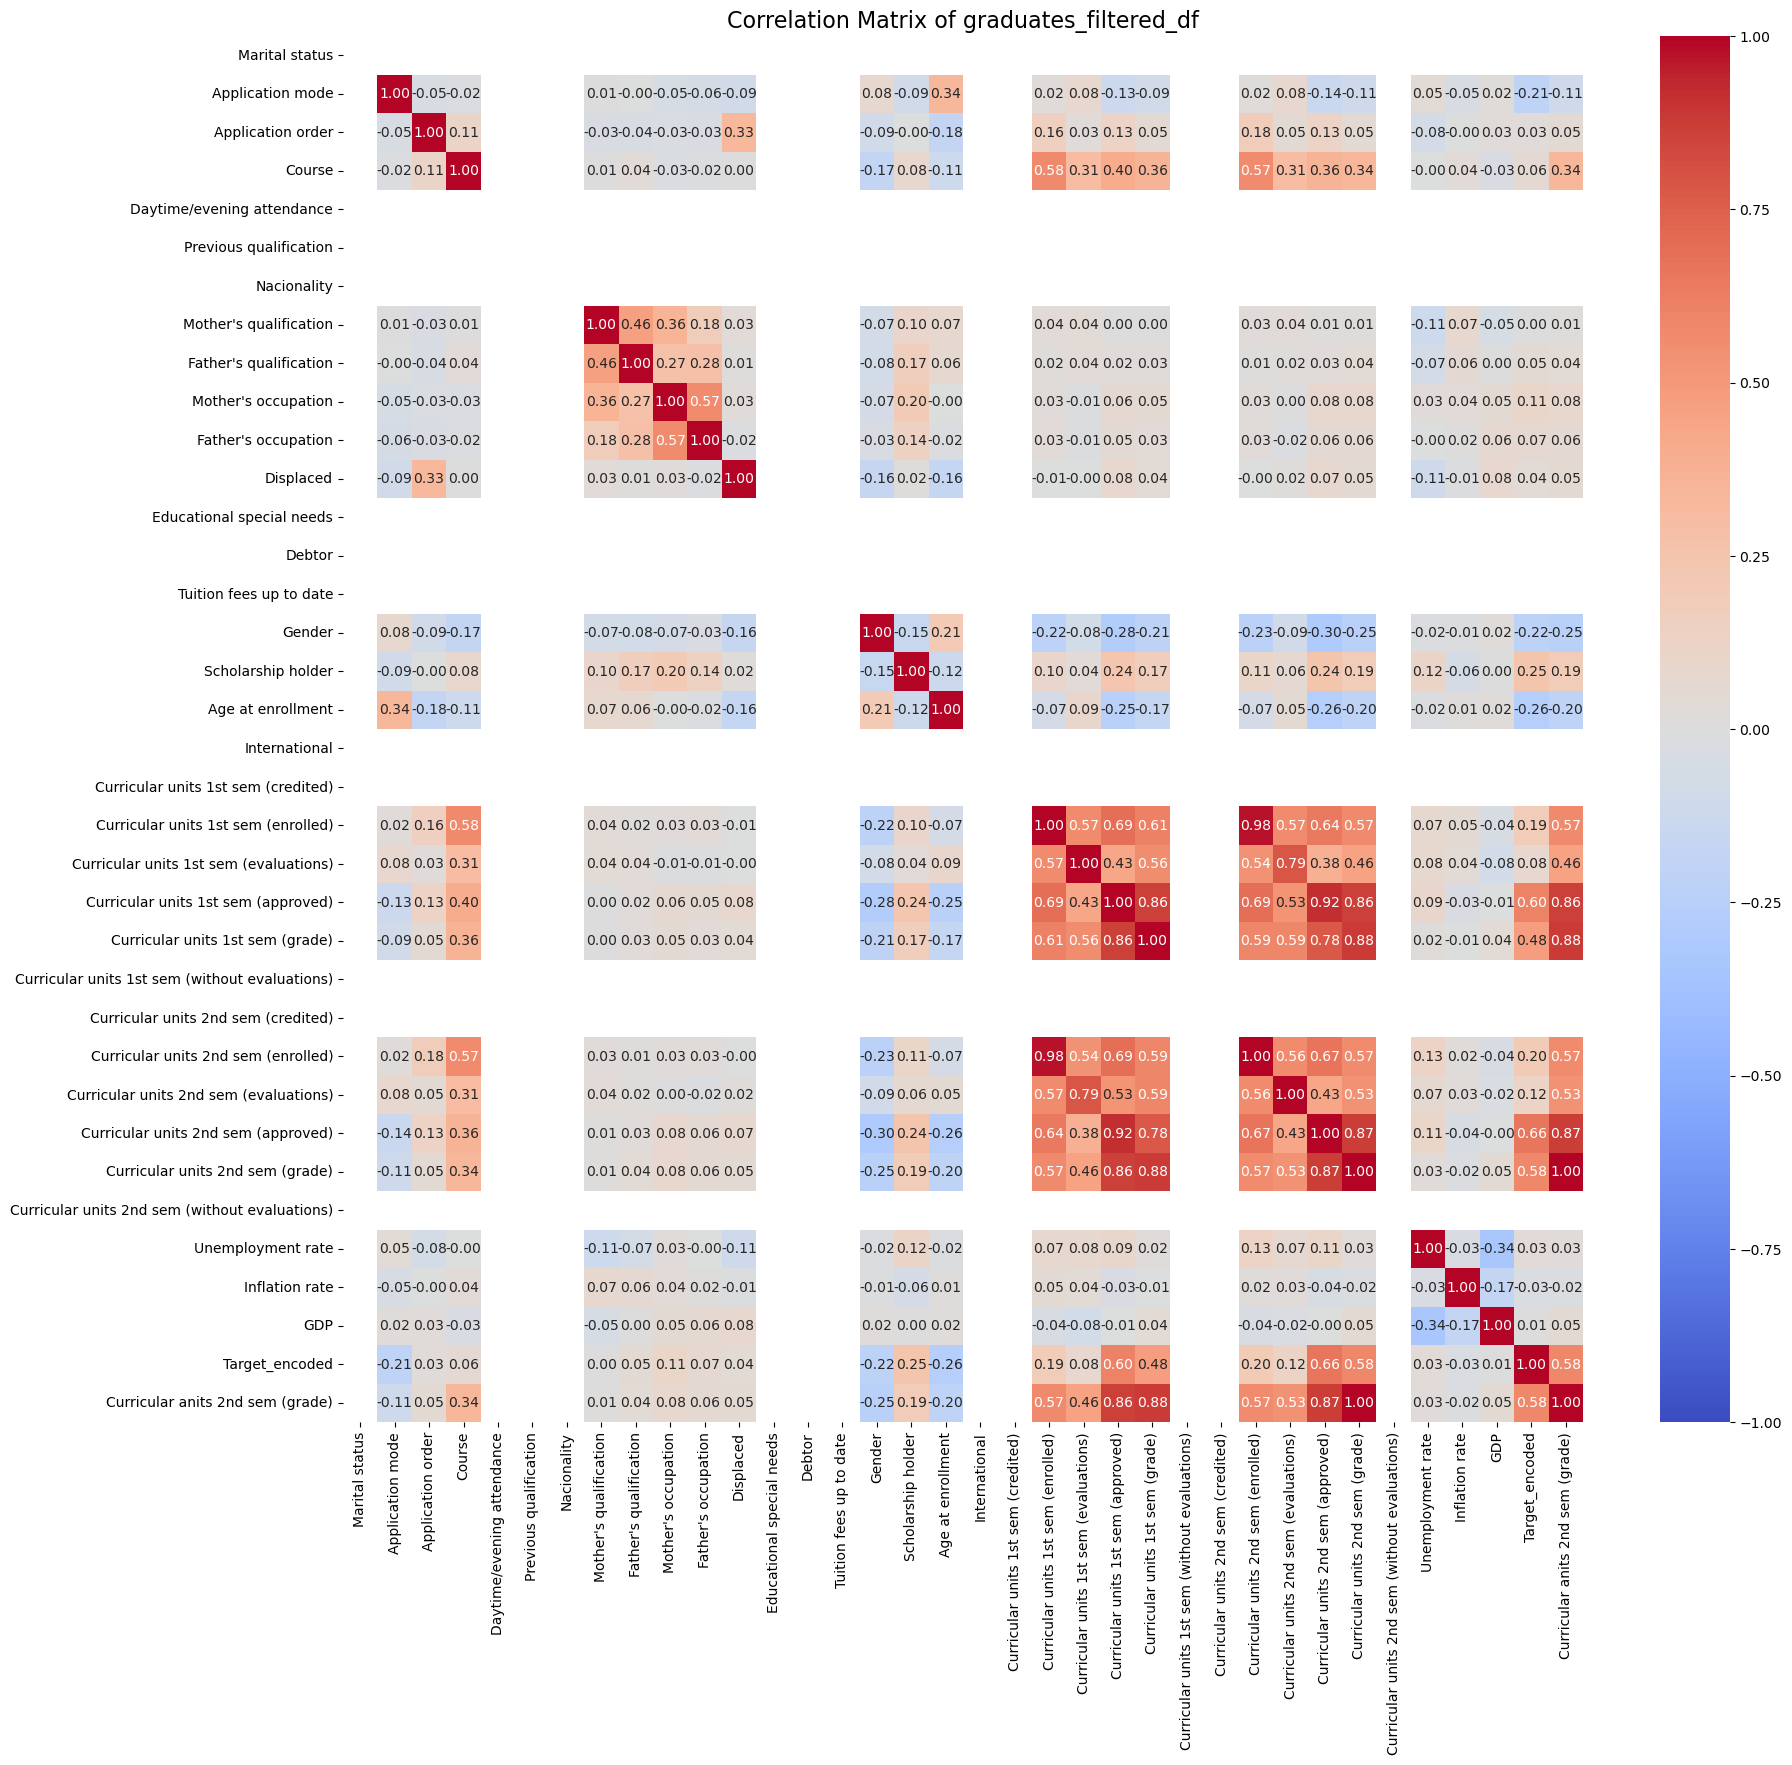

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a larger matplotlib figure to make each box bigger
plt.figure(figsize=(20, 18))

# Draw the heatmap with adjusted annotation font size for readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 10}, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title("Correlation Matrix of graduates_filtered_df", fontsize=16)
plt.show()


In [530]:
# Calculate the correlation matrix
correlation_matrix_target = graduates_normalized_df.corr()

# Select correlations with the 'Target' column, sort by absolute value, and exclude 'Target' itself
target_correlations = correlation_matrix_target["Target_encoded"].abs().sort_values(ascending=False).drop("Target_encoded")

# Display the top correlated attributes with 'Target'
print("Attributes most correlated with 'Target':\n", target_correlations)


Attributes most correlated with 'Target':
 Curricular units 2nd sem (approved)               0.661492
Curricular units 1st sem (approved)               0.603765
Curricular units 2nd sem (grade)                  0.579188
Curricular anits 2nd sem (grade)                  0.579188
Curricular units 1st sem (grade)                  0.478834
Age at enrollment                                 0.259232
Scholarship holder                                0.248094
Gender                                            0.223054
Application mode                                  0.206364
Curricular units 2nd sem (enrolled)               0.200783
Curricular units 1st sem (enrolled)               0.194384
Curricular units 2nd sem (evaluations)            0.121803
Mother's occupation                               0.108372
Curricular units 1st sem (evaluations)            0.078940
Father's occupation                               0.069064
Course                                            0.060325
Father's qual

In [531]:
# Calculate the correlation matrix
correlation_matrix_target = graduates_normalized_df.corr()

# Select correlations with the 'Target' column, sort by absolute value, and exclude 'Target' itself
target_correlations = correlation_matrix_target["Target_encoded"].abs().sort_values(ascending=True).drop("Target_encoded")

# Display the top correlated attributes with 'Target'
print("Attributes most correlated with 'Target':\n", target_correlations)

Attributes most correlated with 'Target':
 Mother's qualification                            0.002891
GDP                                               0.005633
Application order                                 0.025436
Inflation rate                                    0.028415
Unemployment rate                                 0.031857
Displaced                                         0.042329
Father's qualification                            0.046930
Course                                            0.060325
Father's occupation                               0.069064
Curricular units 1st sem (evaluations)            0.078940
Mother's occupation                               0.108372
Curricular units 2nd sem (evaluations)            0.121803
Curricular units 1st sem (enrolled)               0.194384
Curricular units 2nd sem (enrolled)               0.200783
Application mode                                  0.206364
Gender                                            0.223054
Scholarship h

# Step 3 (?): Selecting only attributes that correlates more than 0.1

In [532]:
# List of columns to keep
columns_to_keep = [
    "Curricular units 2nd sem (approved)", 
    "Curricular anits 2nd sem (grade)", 
    "Curricular units 2nd sem (grade)", 
    "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (grade)", 
    "Tuition fees up to date", 
    "Age at enrollment", 
    "Scholarship holder", 
    "Debtor", 
    "Gender", 
    "Application mode", 
    "Curricular units 2nd sem (enrolled)", 
    "Curricular units 1st sem (enrolled)", 
    "Curricular units 2nd sem (evaluations)", 
    "Displaced", 
    "Curricular units 2nd sem (without evaluations)", 
    "Target_encoded"
]

# Create a new DataFrame with only the selected columns
graduates_filtered_df = graduates_normalized_df[columns_to_keep]


graduates_filtered_df.head(16)

,Curricular units 2nd sem (approved),Curricular anits 2nd sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Age at enrollment,Scholarship holder,Debtor,Gender,Application mode,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Curricular units 2nd sem (evaluations),Displaced,Curricular units 2nd sem (without evaluations),Target_encoded
0,0.000,0.000000,0.000000,0.000,0.000000,1,0.136364,0,0,1,6,0.0,0.000000,0.000000,1,0.0,0
3,0.625,0.667692,12.400000,0.750,0.774725,1,0.136364,0,0,0,6,0.6,0.500000,0.454545,1,0.0,1
6,1.000,0.772423,14.345000,0.875,0.767308,1,0.045455,1,0,0,0,0.8,0.583333,0.363636,1,0.0,1
10,0.625,0.764615,14.200000,0.750,0.711538,1,0.045455,0,0,0,0,0.6,0.500000,0.318182,1,0.0,1
11,0.875,0.711538,13.214286,0.875,0.762363,1,0.045455,1,0,0,0,0.8,0.666667,0.363636,1,0.0,1
12,0.000,0.000000,0.000000,0.000,0.000000,1,0.090909,0,0,0,0,0.6,0.500000,0.000000,1,0.0,0
14,0.625,0.646154,12.000000,0.500,0.764423,1,0.045455,1,0,0,0,0.5,0.416667,0.227273,1,0.0,1
15,0.000,0.000000,0.000000,0.625,0.761538,1,0.136364,0,0,0,0,0.6,0.500000,0.318182,1,0.0,0
17,1.000,0.783192,14.545000,0.875,0.767668,1,0.045455,0,0,0,6,0.8,0.583333,0.363636,1,0.0,1
20,0.000,0.000000,0.000000,0.000,0.000000,1,0.181818,1,0,0,0,0.0,0.000000,0.000000,0,0.0,1


# Step 4: Implementing clustering methods

Til rapporten, ta med resultat før PCA og resultat fra metodene etter implementert PCA


### Before doing the algorithms, here is PCA visualization to see how many components is needed


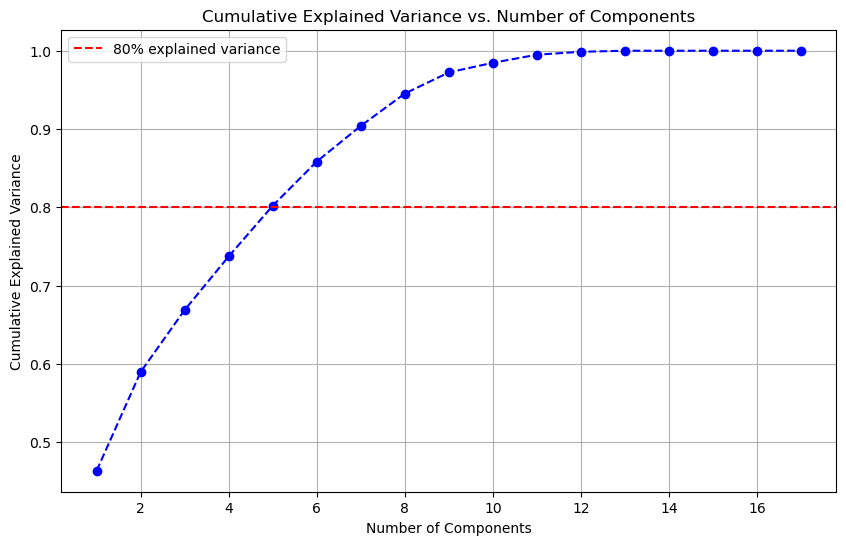

Number of components needed to explain 80% of the variance: 5


In [533]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming graduates_filtered_df is your dataset

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(graduates_filtered_df)  # Scaling the data

# Step 2: Apply PCA
pca = PCA(n_components=X_scaled.shape[1])  # Set number of components to the number of features
pca.fit(X_scaled)

# Step 3: Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Step 4: Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Step 5: Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), cumulative_explained_variance, marker='o', color='b', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 6: Determine number of components for 80% explained variance
n_components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f"Number of components needed to explain 80% of the variance: {n_components_80}")


## 4.1 Implementing K-means

Have to do this better, it doesnt make sense.


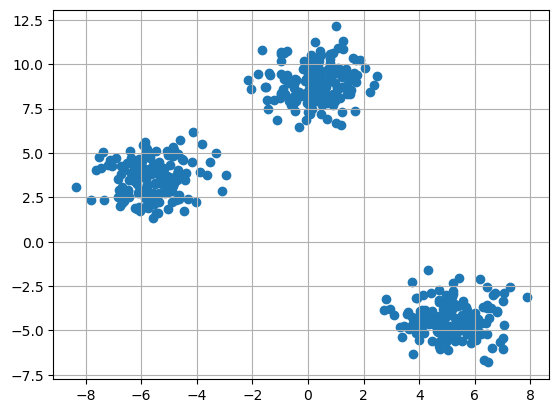

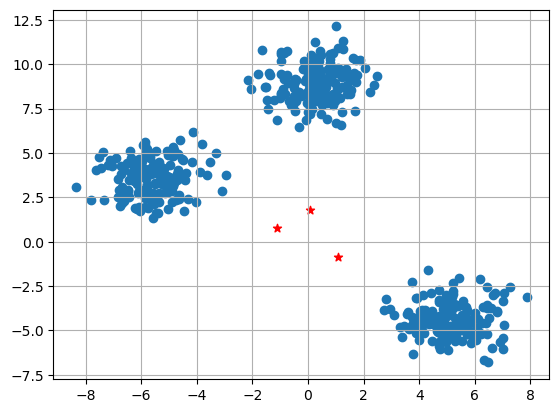

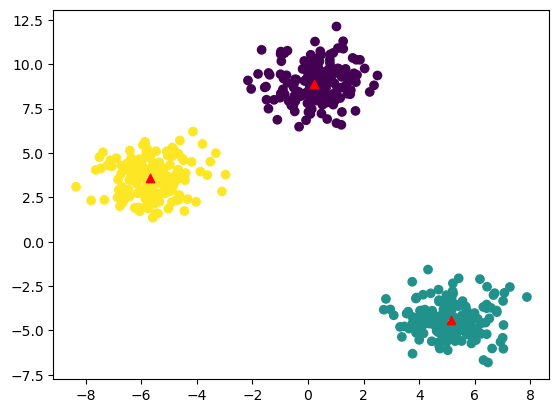

In [534]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create the custom dataset with make_blobs and plot it
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

#Initialize the random centroids
k = 3
clusters = {}
np.random.seed(23)
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {'center' : center, 'points' : []}
    clusters[idx] = cluster
clusters

# Plot the random initialize center with data points
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')
plt.show()

# Define euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Stepdef
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters


#Create the function to Predict the cluster for the datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

#Assign, Update, and predict the cluster center
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

#Plot the data points with their predicted cluster center
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

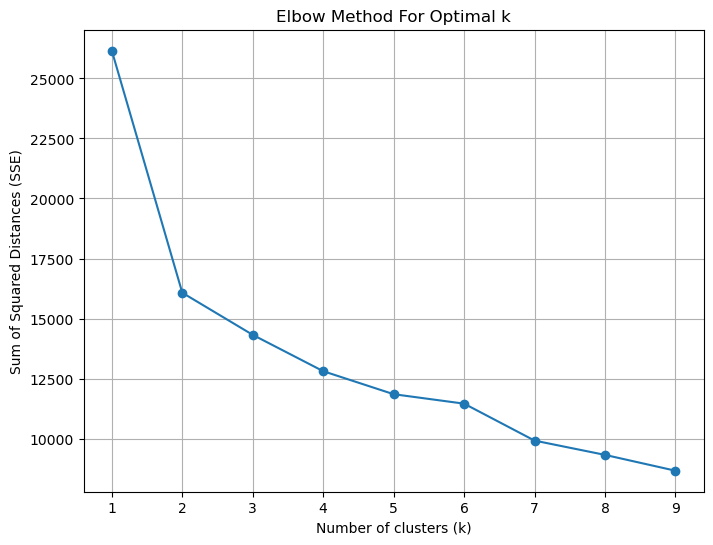

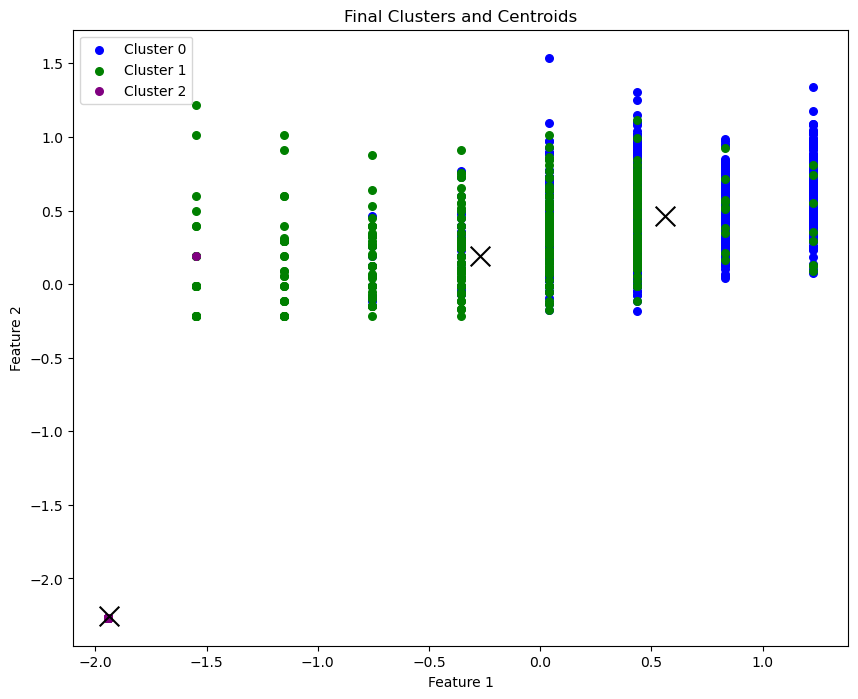

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Standardize the dataset to normalize features
scaler = StandardScaler()
graduates_normalized = scaler.fit_transform(graduates_filtered_df)

# Define Euclidean distance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Initialize random centroids
def initialize_centroids(X, k, seed=23):
    np.random.seed(seed)
    centroids = []
    for _ in range(k):
        center = 2 * (2 * np.random.random((X.shape[1],)) - 1)
        centroids.append(center)
    return np.array(centroids)

# E-step: Assign clusters
def assign_clusters(X, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in X:
        distances = [distance(point, centroid) for centroid in centroids]
        closest_cluster = np.argmin(distances)
        clusters[closest_cluster].append(point)
    return clusters

# M-step: Update centroids
def update_centroids(clusters, k):
    new_centroids = []
    for i in range(k):
        points = clusters[i]
        if points:
            new_centroids.append(np.mean(points, axis=0))
        else:  # In case a cluster has no points assigned, keep it in the same place
            new_centroids.append(np.zeros(len(points[0])))
    return np.array(new_centroids)

# Function to calculate sum of squared distances (for elbow method)
def calculate_sse(X, clusters, centroids):
    sse = 0
    for i in range(len(centroids)):
        points = clusters[i]
        sse += np.sum((points - centroids[i]) ** 2)
    return sse

# K-means function that performs multiple iterations
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(clusters, k)
        if np.all(centroids == new_centroids):
            break  # Convergence condition
        centroids = new_centroids
    return centroids, clusters

# Elbow method to find optimal k
sse_values = []
K = range(1, 10)  # Try different values of k
for k in K:
    centroids, clusters = kmeans(graduates_normalized, k)
    sse = calculate_sse(graduates_normalized, clusters, centroids)
    sse_values.append(sse)

# Plot SSE values to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(K, sse_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Run K-means with the optimal number of clusters (determined from the elbow plot)
optimal_k = 3  # Example optimal k; you may set this after looking at the elbow plot
final_centroids, final_clusters = kmeans(graduates_normalized, optimal_k)

# Visualize the final clusters
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'purple', 'orange', 'red']  # Add more colors if needed

for i, points in final_clusters.items():
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], s=30, color=colors[i], label=f'Cluster {i}')
    plt.scatter(final_centroids[i][0], final_centroids[i][1], s=200, c='black', marker='x')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Final Clusters and Centroids')
plt.show()


## 4.2 Implementing DBSCAN

### DBSCAN without PCA

Number of clusters (excluding noise): 24


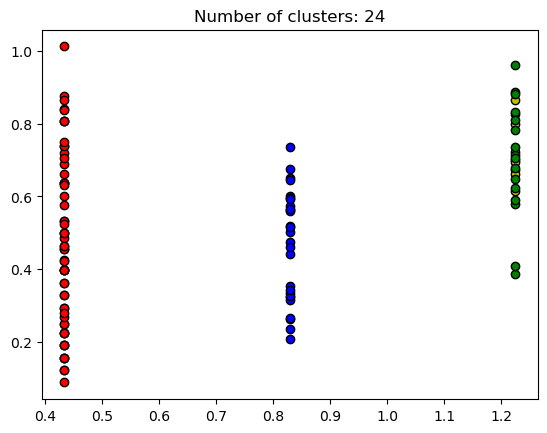

Silhouette Coefficient: -0.26


In [536]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Assuming graduates_filtered_df is your dataset
# Step 1: Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(graduates_filtered_df)  # Scaling the data

# Step 2: Apply DBSCAN directly on the scaled data
db = DBSCAN(eps=0.5, min_samples=8).fit(X_scaled)  # DBSCAN on the original, scaled data
labels = db.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Step 3: Number of clusters (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters (excluding noise): {n_clusters_}')

# Step 4: Plotting the clustering result
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']  # Assign colors for the clusters

# Plot each cluster and noise (if any)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Use black for noise
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & core_samples_mask]  # Core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    xy = X_scaled[class_member_mask & ~core_samples_mask]  # Border samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters_}')
plt.show()

# Step 5: Evaluation Metrics
# Check if we have at least two clusters for Silhouette Score calculation
if n_clusters_ > 1:
    # Silhouette Score: Measures the quality of clusters
    sc = silhouette_score(X_scaled, labels)
    print(f"Silhouette Coefficient: {sc:.2f}")
else:
    print("Silhouette Score cannot be computed, as there is only one cluster or noise.")

# Adjusted Rand Index: Measures similarity between the true labels and predicted labels
# If you have true labels for evaluation, replace `y_true` with your true labels
# y_true = <your true labels>
# ari = adjusted_rand_score(y_true, labels)
# print(f"Adjusted Rand Index: {ari:.2f}")


Number of clusters (excluding noise): 69


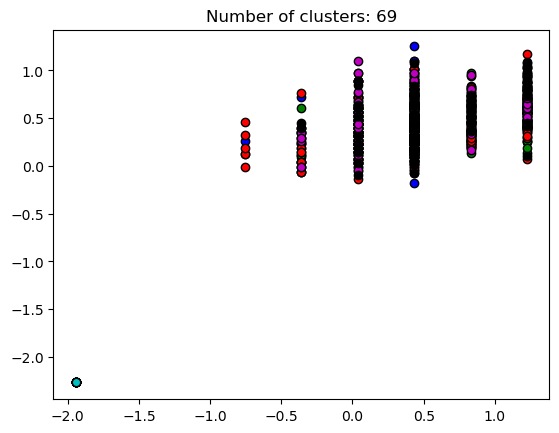

Silhouette Coefficient: 0.16


In [537]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(graduates_filtered_df)

# Try different values for eps and min_samples
db = DBSCAN(eps=1.0, min_samples=3)  # Adjust these parameters
labels = db.fit_predict(X_scaled)

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters (ignoring noise if present)
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters (excluding noise): {n_clusters_}')

# Plotting clusters
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']  # Assign colors for up to 7 clusters
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Use black for noise
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters_}')
plt.show()

# Calculate the Silhouette Score if there are more than one cluster
if n_clusters_ > 1:
    sc = silhouette_score(X_scaled, labels)
    print(f"Silhouette Coefficient: {sc:.2f}")
else:
    print("Silhouette Score cannot be computed, as there is only one cluster or noise.")


### DBSCAN with PCA

Number of clusters (excluding noise): 69


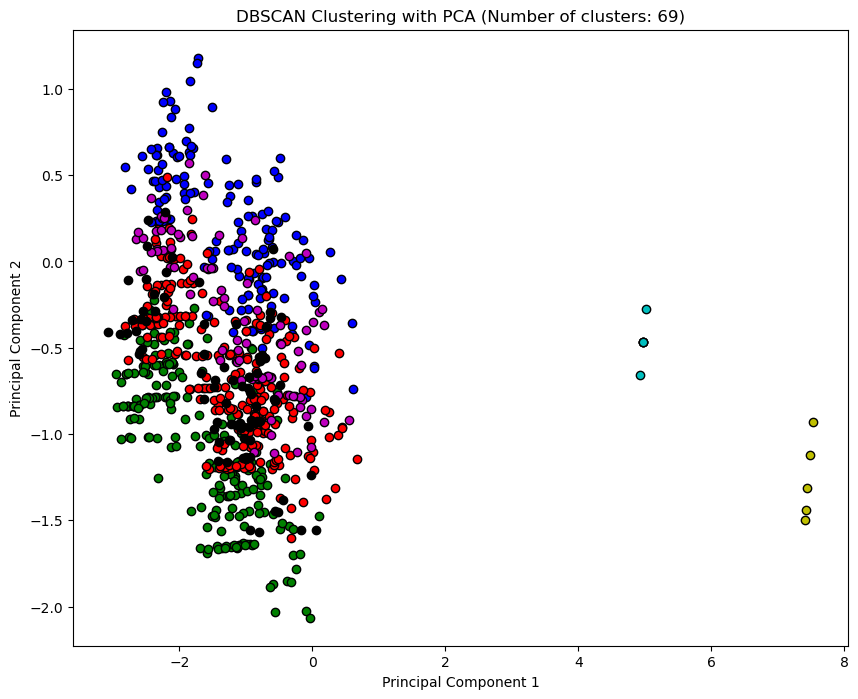

Silhouette Coefficient: 0.16


In [538]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming graduates_filtered_df is your dataset

# Step 1: Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(graduates_filtered_df)  # Scaling the data

# Step 2: Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)  # Reduce to 2D

# Step 3: Apply DBSCAN directly on the scaled data
# Adjusting eps and min_samples to control the number of clusters
db = DBSCAN(eps=1.0, min_samples=3)  # You can adjust these parameters
labels = db.fit_predict(X_scaled)  # Get the cluster labels

# Step 4: Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Step 5: Number of clusters (ignoring noise if present)
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters (excluding noise): {n_clusters_}')

# Step 6: Plotting the PCA results and clusters
plt.figure(figsize=(10, 8))

# Define colors for clusters (using more colors if needed)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'k']

# Plot each cluster and noise (if any)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Use black for noise
    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask & core_samples_mask]  # Core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    xy = X_pca[class_member_mask & ~core_samples_mask]  # Border samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN Clustering with PCA (Number of clusters: {n_clusters_})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 7: Evaluation Metrics

# Silhouette Score: Measures the quality of clusters
if n_clusters_ > 1:
    sc = silhouette_score(X_scaled, labels)
    print(f"Silhouette Coefficient: {sc:.2f}")
else:
    print("Silhouette Score cannot be computed, as there is only one cluster or noise.")

# You can also compute Adjusted Rand Index if you have true labels (optional)
# ari = adjusted_rand_score(y_true, labels)
# print(f"Adjusted Rand Index: {ari:.2f}")


### Evaluation metrics

In [539]:
from sklearn.metrics import silhouette_score

# Silutette Score: Measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

if len(set(labels)) > 1:  # DBSCAN might return only one cluster (-1 for noise)
    silhouette = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    print("Silhouette Score cannot be computed, as there is only one cluster or noise.")


#ARI: Adjusted Rand Index measures the similarity between two clusterings. A higher ARI score indicates better clustering.
from sklearn.metrics import adjusted_rand_score

# Assuming you have true labels `y_true` (if you have them)
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index: {ari:.2f}")





Silhouette Score: 0.16


NameError: name 'y_true' is not defined